<a href="https://colab.research.google.com/github/catalina-delgado/Data-Analytics/blob/main/ClasificadorGrietas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problema de clasificación
Entrada:
Imágen
Salida: 4 Categorias:
Ductil
Fragil
Estatica
Retardada


# 1. Introduccion

El concreto es el material de construcción más versátil y con mayoría de usos en el campo de la ingeniería civil, pero la falla más notoria que llega a presentar es la formación de agrietamientos. Esta formación de grietas se debe principalmente a cuatro causas: electroquímicas, físicas, químicas y mecánicas. Los métodos de inspección o medición tienen como objetivo identificar los agrietamientos, tanto en interior como exterior de los elementos analizados, de tal manera que se pueda elegir los materiales y métodos adecuados para reparar los defectos en concreto.

La identificación de grietas por inspección visual se basa principalmente en los sentidos humanos, como la observación, tacto y oído, también hay que resaltar que la inspección visual es la más utilizada en la industria, ya que por este método se logran detectar alrededor del 80% de agrietamientos en las estructuras. Sin embargo, los desafíos en la identificación de grietas surgen de factores como microfisuras, grietas delgadas y poco profundas, un fondo desordenado y distractores en primer plano. Además, este método de inspección requiere tiempo, mano de obra técnica y es cosotoso. En respuesta a estos desafíos las redes neuronales convolucionales (CNN por sus siglas en inglés, Convolutional Neural Networks) son una solución complementaria para la detección de grietas y la gestión y mantenimiento de estructuras.

Las CNN son un tipo de arquitectura de redes neuronales profundas diseñadas específicamente para procesar datos en forma de arreglos multidimensionales, como imágenes. Estas redes son fundamentales en el campo de la visión por computadora y se utilizan ampliamente para tareas como reconocimiento de imágenes, detección de objetos, segmentación semántica, entre otras. Las CNN han demostrado un gran rendimiento en el análisis y procesamiento de datos visuales debido a su capacidad para capturar patrones y características jerárquicas dentro de las imágenes.

Las CNN han sido útiles en el reconocimiento de grietas en concreto y en tareas de inspección visual automatizada en la industria de la construcción. Esto ha llevado a un avance significativo en la industria de la construcción al mejorar la seguridad y la durabilidad de las estructuras de concreto.

Se resalta la importancia del conjunto de datos para la tarea de clasificación con CNN, por simplicidad y recursos disponibles, el Objetivo de este trabajo es identificar la existencia de grietas en concreto a través de dos clases, positivo para muestras con precencia de grietas y negativo para muestras sin grieta.

# 2. Datos y Métodos

## 2.1 Datos

Las 12000 imágenes utilizadas en este ejercicio están extraídas del conjunto de datos "Concrete Crack" compuesto por 40000 imágenes, disponible en Kaggle. Contiene 2 subconjuntos denominados positivo (con grieta) y negativo (sin grieta).

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
print('total positive images:', len(os.listdir('/content/drive/MyDrive/dataset/Positive')))
print('total negative images:', len(os.listdir('/content/drive/MyDrive/dataset/Negative')))

In [ ]:
import zipfile
local_zip = '/content/drive/MyDrive/dataset/crackConcrete.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/drive/MyDrive/dataset')
zip_ref.close()

In [ ]:
import os
import random
import shutil

# Directorio base donde se encuentra el conjunto de datos
base_dir = '/content/drive/MyDrive/dataset'

# Rutas a los directorios de entrenamiento y validación
negative_dir = os.path.join(base_dir, 'Negative')
positive_dir = os.path.join(base_dir, 'Positive')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Porcentaje de archivos a mover
porcentaje_a_mover = 20  # Porcentaje a mover, ajusta según tu preferencia

# Obtener la lista de archivos en train
archivos_en_N = os.listdir(os.path.join(train_dir, 'Negative'))
archivos_en_P = os.listdir(os.path.join(train_dir, 'Positive'))

# Calcular la cantidad de archivos a mover
cantidad_a_mover_n = int(len(archivos_en_N) * (porcentaje_a_mover / 100))
cantidad_a_mover_p = int(len(archivos_en_P) * (porcentaje_a_mover / 100))

# Elegir aleatoriamente los archivos a mover
archivos_a_mover_n = random.sample(archivos_en_N, cantidad_a_mover_n)
archivos_a_mover_p = random.sample(archivos_en_P, cantidad_a_mover_p)

In [ ]:
# Mover los archivos a la carpeta de validación
for archivo in archivos_a_mover_n:
    origen = os.path.join(os.path.join(train_dir, 'Negative'), archivo)
    destino = os.path.join(os.path.join(validation_dir, 'Negative'), archivo)
    shutil.move(origen, destino)

In [ ]:
# Mover los archivos a la carpeta de validación
for archivo in archivos_a_mover_p:
    origen = os.path.join(os.path.join(train_dir, 'Positive'), archivo)
    destino = os.path.join(os.path.join(validation_dir, 'Positive'), archivo)
    shutil.move(origen, destino)

##2.2 Método

**1 Adquisición y preprocesamiento de datos:**
Obtener un conjunto de datos etiquetado que contenga imágenes de los objetos que deseas clasificar.
Preprocesar las imágenes, lo que puede incluir redimensionarlas, normalizarlas, cambiar su resolución o realizar otras transformaciones para prepararlas para el modelo.

**2 Cargar un modelo CNN:**
Puedes crear un modelo CNN desde cero o utilizar arquitecturas de redes pre-entrenadas, como VGG, ResNet, Inception, etc., disponibles en bibliotecas como PyTorch o TensorFlow/Keras.
Si eliges una red pre-entrenada, puedes ajustarla a tus datos específicos utilizando transferencia de aprendizaje.

**3 Entrenamiento del modelo:**
Dividir tu conjunto de datos en conjuntos de entrenamiento, validación y prueba.
Entrenar el modelo utilizando el conjunto de entrenamiento, ajustando los pesos de la red para reconocer patrones en las imágenes y sus etiquetas asociadas.

**4 Validación y ajuste del modelo:**
Utilizar el conjunto de validación para ajustar los hiperparámetros del modelo y evitar el sobreajuste (overfitting).
Evaluar el rendimiento del modelo en el conjunto de prueba para estimar su precisión.

**Clasificación de objetos:**
Utilizar el modelo entrenado para predecir la clase u objeto presente en una imagen nueva o no vista.

#3. Resultados

## 3.1 Preprocesamiento de datos:

Los datos se han organizado previamente, de tal manera que se divida el conjunto de datos de 12000 imágenes en dos subconjuntos. El primer subconjunto es de entrenamiento con el 80% de los datos, el segundo subconjunto es de validación con el 20% de los datos.

In [ ]:
import os

base_dir = '/content/drive/MyDrive/dataset'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directorio con las imágenes de entrenamiento con grietas
train_crack_dir = os.path.join(train_dir, 'Positive')

# Directorio con las imágenes de entrenamiento sin grietas
train_nocrack_dir = os.path.join(train_dir, 'Negative')

# Directorio con las imágenes de validación con grietas
validation_crack_dir = os.path.join(validation_dir, 'Positive')

# Directorio con las imágenes de validación sin grietas
validation_nocrack_dir = os.path.join(validation_dir, 'Negative')

In [ ]:
train_crack_fnames = os.listdir(train_crack_dir)
print(train_crack_fnames[:10])

train_nocrack_fnames = os.listdir(train_nocrack_dir)
train_nocrack_fnames.sort()
print(train_nocrack_fnames[:10])



['00007.jpg', '00009.jpg', '00016.jpg', '00018.jpg', '00019.jpg', '00020.jpg', '00025.jpg', '00027.jpg', '00037.jpg', '00039.jpg']
['.ipynb_checkpoints', '00002.jpg', '00004.jpg', '00005.jpg', '00011.jpg', '00013.jpg', '00023.jpg', '00024.jpg', '00026.jpg', '00030.jpg']


In [ ]:
print('total training crack images:', len(os.listdir(train_crack_dir)))
print('total training nocrack images:', len(os.listdir(train_nocrack_dir)))
print('total validation crack images:', len(os.listdir(validation_crack_dir)))
print('total validation nocrack images:', len(os.listdir(validation_nocrack_dir)))

total training crack images: 4800
total training nocrack images: 4801
total validation crack images: 1200
total validation nocrack images: 1201


Se usa TensorFlow para cargar el conjunto de datos de imágenes desde los directorios anteriormente definidos y configurarlo de acuerdo al tamaño del lote, para el entrenamiento del modelo.

In [ ]:
import tensorflow as tf

BATCH = 26
IMG_WIDTH = 96
IMG_HEIGHT = 96

train_loader = tf.keras.preprocessing.image_dataset_from_directory(
train_dir,
seed=123,
image_size=(IMG_HEIGHT, IMG_WIDTH),
batch_size=BATCH
)

Found 9600 files belonging to 2 classes.


**Espacio Muestral del conjunto de datos utilizado**

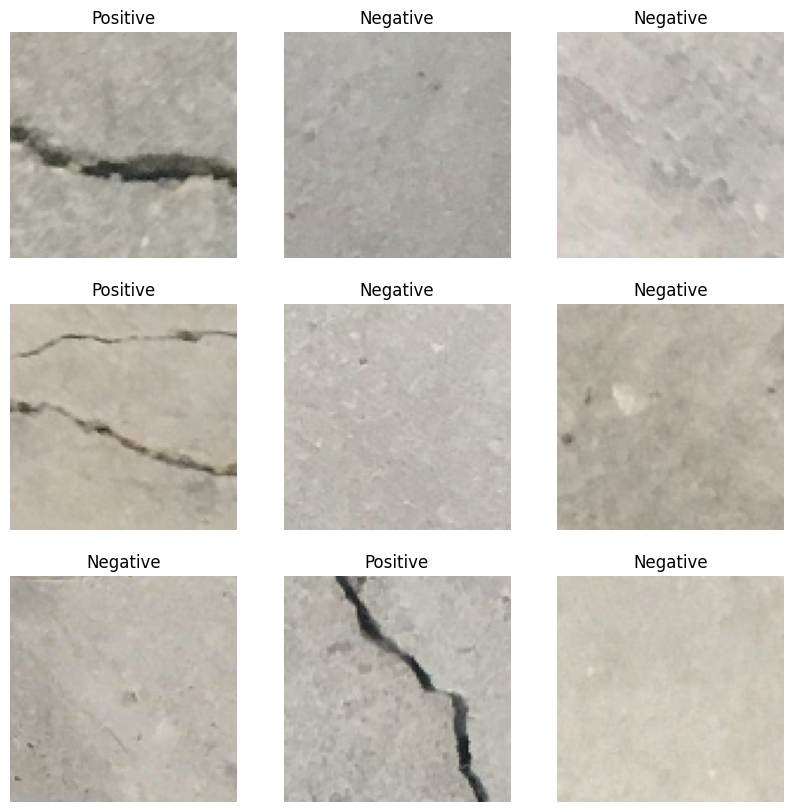

In [ ]:
import matplotlib.pyplot as plt

class_names = train_loader.class_names
plt.figure(figsize=(10, 10))
for images, labels in train_loader.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

### 3.1.1 Reducción de Sobreajuste

Para mayor precisión y miitigar el sobreajuste se emplea la estrategia de aumento y abandono de datos.

**Aumento de datos:** se definen transformaciones aleatorias como: rotación, fracción del tamaño de la imágen, rangos de corte y aumento, orientación horizontal, relleno de pixeles que se realizan en las imágenes leídas por la instancia ImageDataGenerator. Esto ayuda a prevenir el sobreajuste y ayuda a que el modelo se generalice mejor.

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(96, 96),
        batch_size=8,
        class_mode='binary')

val_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(96, 96),
        batch_size=8,
        class_mode='binary')

Found 9600 images belonging to 3 classes.
Found 2400 images belonging to 3 classes.


## 3.2 Modelo CNN para Clasificación (Usando keras)

**Arquitectura:** se utiliza la arquitectura de Inception V3 y se agregan capas densas adicionales para adaptar el modelo a una tarea de clasificación binaria.

In [ ]:
from tensorflow.keras import layers, Model

### 3.2.1 Modelo PreEntrenado

Una práctica común en visión por computadora es tomar un modelo entrenado en un conjunto de datos muy grande, reentrenarlo con el conjunto de datos propio y extraer las representaciones intermedias (características) que el modelo genera. Para este estudio de clasificación se usa el modelo Inception V3 desarrollado por Google y pre-entrenado en ImageNet, un gran conjunto de datos de imágenes web (1.4 millones de imágenes y 1000 clases)

El modelo es cargado con una red que no incluye las capas de la operación de aplanamiento, ni las actualizaciones de los pesos de entrenamiento. Para la extracción de las características se obtiene la capa **mixed7** ya que proporciona un mapa de características de 7x7

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'
pre_trained_model = InceptionV3(
    input_shape=(150, 150, 3), include_top=False, weights=None)
pre_trained_model.load_weights(local_weights_file)

In [ ]:
for layer in pre_trained_model.layers:
  layer.trainable = False

In [ ]:
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape:', last_layer.output_shape)
last_output = last_layer.output

last layer output shape: (None, 7, 7, 768)


**Dropout** se desactiva aleatoriamente el 20% de las unidades neuronales durante el entrenamiento para evitar el sobreajuste

In [ ]:
from tensorflow.keras.optimizers import RMSprop

# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(100, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)
# Add a final sigmoid layer for classification
x = layers.Dense(1, activation='sigmoid')(x)

# Configure and compile the model
model = Model(pre_trained_model.input, x)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 150, 150, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 74, 74, 32)           864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 74, 74, 32)           96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 74, 74, 32)           0         ['batch_normalization[0][0

La columna "forma de salida" muestra cómo evoluciona el tamaño de su mapa de características en cada capa sucesiva. Las capas de convolución reducen un poco el tamaño de los mapas de características debido al relleno, y cada capa de agrupación divide a la mitad el mapa de características.

###3.2.2 Entrenamiento

Entrenaremos nuestro modelo con la pérdida de entropía cruzada binaria, porque es un problema de clasificación binaria y nuestra activación final es un sigmoide. Usaremos el optimizador rmsprop con una tasa de aprendizaje de 0,001. Durante el entrenamiento, querremos monitorear la precisión de la clasificación.


In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

Entrenemos en las 2000 imágenes disponibles, durante 2 épocas, y validemos en las 1000 imágenes de validación. (Esto puede tardar unos minutos en ejecutarse).

In [ ]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=50,
      epochs=2,
      validation_data=validation_generator,
      validation_steps=25,
      verbose=2)

Epoch 1/2


<ipython-input-68-0635517a8f02>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


InvalidArgumentError: ignored

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(len(acc))

plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Figura 1: Precisión de entrenamiento y Validación')

##3.3 Validación y Ajuste

### 3.3.1 Ajuste Fino

Se ajusta las capas superiores de Inception V3 para que sean entrenables, reentrenando el modelo obteniendo todas las capas del módulo **mixed7**

In [ ]:
from tensorflow.keras.optimizers import SGD

unfreeze = False

# Descongelamiento de todas las capas después del módulo "mixed6"
for layer in pre_trained_model.layers:
  if unfreeze:
    layer.trainable = True
  if layer.name == 'mixed6':
    unfreeze = True

model.compile(loss='binary_crossentropy',
              optimizer=SGD(learning_rate=0.0001),
              metrics=['acc'])

**ReEntrenamiento**

In [ ]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2)

###3.3.2 Validación

Text(0.5, 1.0, 'Training and validation loss')

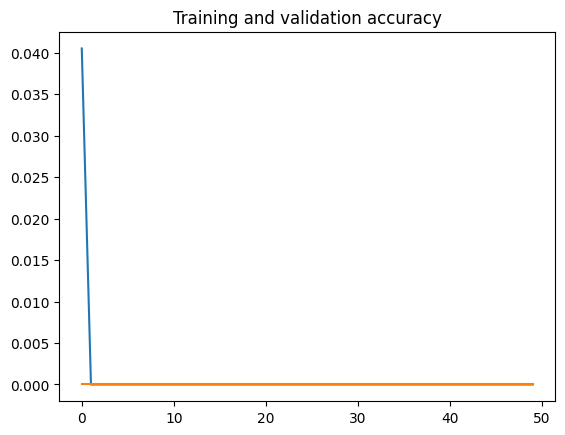

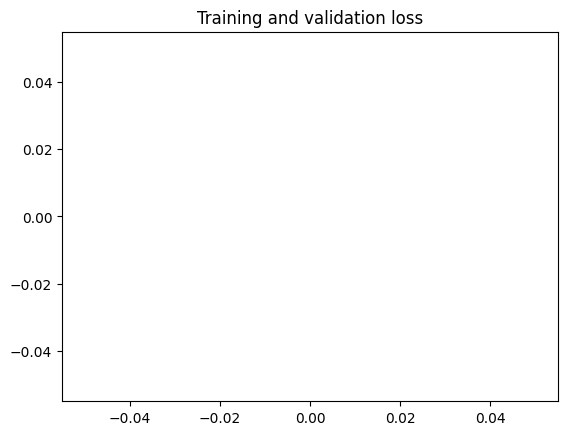

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Figura 2: Precisión de Entrenamiento y Validación')

plt.figure()

plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Figura 3: Pérdida de entrenamiento y validación')

##3.4 Clasificación

In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, decode_predictions
import numpy as np

# Cargar una imagen para clasificar
img_path = 'ruta/de/la/imagen.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# Hacer la predicción
predictions = model.predict(x)
decoded_predictions = decode_predictions(predictions, top=3)[0]  # Decodificar las predicciones

# Mostrar las predicciones
for i, (imagenet_id, label, score) in enumerate(decoded_predictions):
    print(f"{i + 1}: {label} ({score:.2f})")

#4. Conclusiones y Limitaciones

Se ha construido una arquitectura de red convolucionar para clasificación binaria de grietas, con un rendimiento del #####. La red se construyó usando el modelo InceptionV3 con la el módulo mixed 7, utilizando técnicas de reducción de sobreajuste y ajuste fino.

Durante la etapa de entrenamiento del modelo preentrenado, mostrada en la figura 1, se observó una curva de rendimiento creciente con un valor máximo aproximado del ####. En comparación con el modelo rentrenado con los datos estructurados de las grietas (figura 2) el rendimiento del modelo mejoró hasta un ####. Esto lo hace apto para tareas de clasificación e inspección visual binarias.

#5. Referencias

In [ ]:
import os, signal
os.kill(os.getpid(), signal.SIGKILL)

1. Autor, A. A. (2022). Identificación de grietas en concreto, causas, prevención y soluciones: una revisión [Working paper]. Universidad Autónoma de Coahuila.